In [10]:
import pandas as pd
import numpy as np
import matplotlib as mp
import talib
import pickle
%matplotlib inline
import kchart

In [5]:
import os
os.chdir('/Users/alex/Documents/GitHub/M064810011_Quant/金融投資Midterm')
with open('stockdata','rb') as f:
    data=pickle.load(file=f)

In [6]:
df=data['TWIN']

# SAR可作為止損策略的依據
- 若作多，收盤價跌破SAR則賣出
- 若作空，收盤價漲至SAR則回補
- acceleration=0.02, maximum=0.2 是常用的SAR設定

In [51]:
df['SAR']=talib.SAR(df['High'].values,df['Low'].values, acceleration=0.02, maximum=0.2)

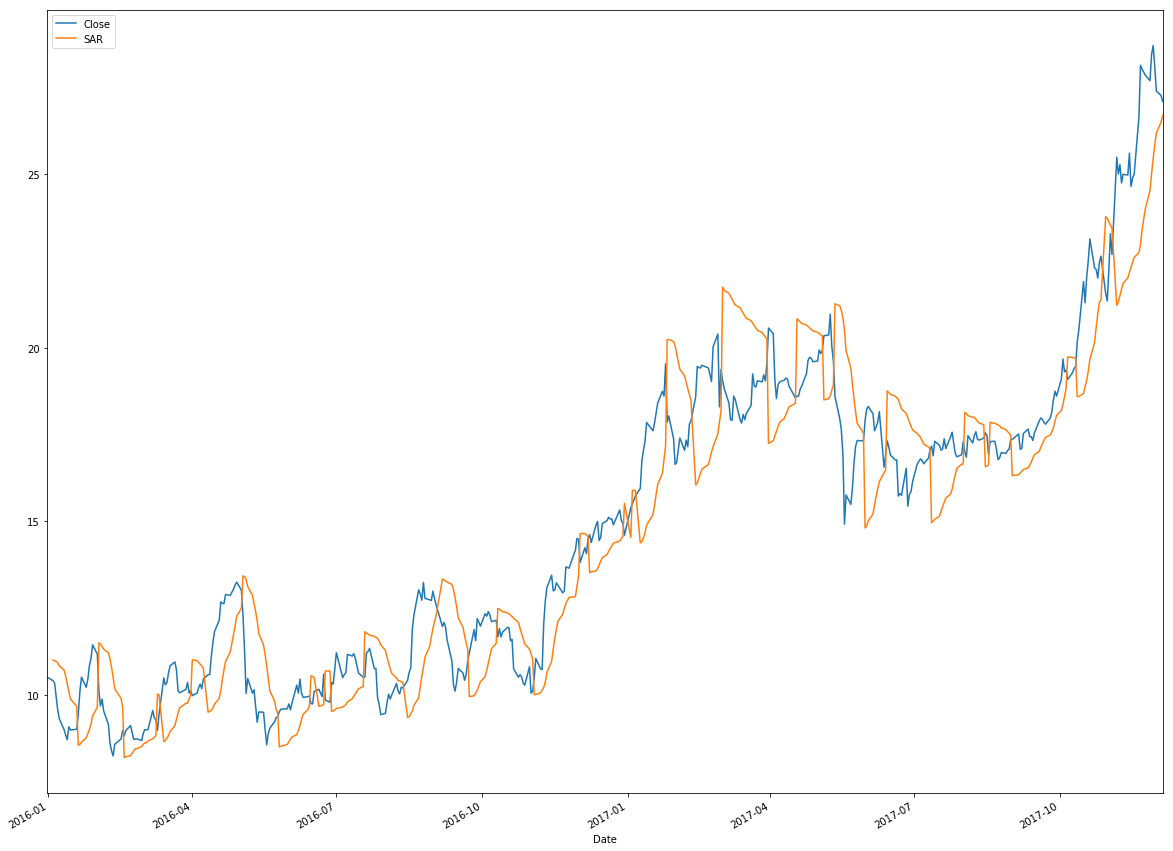

In [52]:
df[['Close','SAR']].plot(legend='best', figsize=(20,16))

## ATR是利用每天的高低收價來判斷股票的波動度
- ATR位於低點的時候代表震盪比較小，反之
- 不過可能要畫出OHLC圖才會比較明顯
- 波動性不能預測市場方向，但就個人看法，波動到極端水平後可能會有一波行情或反轉
- 作為資金管理的依據是不錯的選擇（海龜）

In [66]:
df['ATR']=talib.ATR(df['High'].values,df['Low'].values,df['Close'].values)
df['ATR14MA']=np.round(pd.Series.rolling(df['ATR'], window=14).mean(), 2)
df['14MA']=np.round(pd.Series.rolling(df['Close'], window=14).mean(), 2)
df['ATR_Up']=df['14MA']+2*df['ATR14MA']
df['ATR_Dn']=df['14MA']-2*df['ATR14MA']



In [12]:
import matplotlib.pyplot as plt
import numpy as np

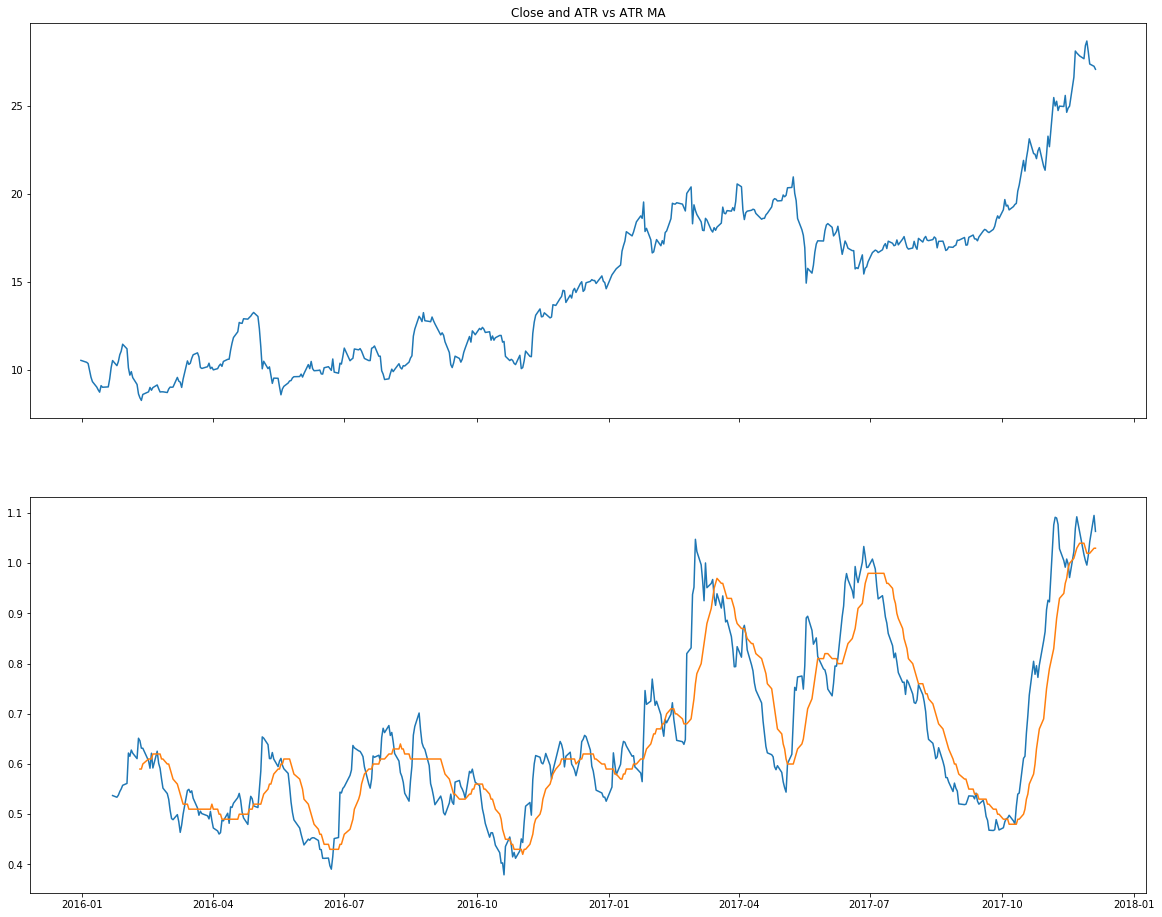

In [68]:
f, axarr = plt.subplots(2, sharex=True,figsize=(20,16))
axarr[0].plot(df['Close'])
axarr[0].set_title('Close and ATR vs ATR MA')
axarr[1].plot(df[['ATR','ATR14MA']])

# 或者也可以將ATR與14日均線變成通道
- 上軌：MA14 + 係數*ATR

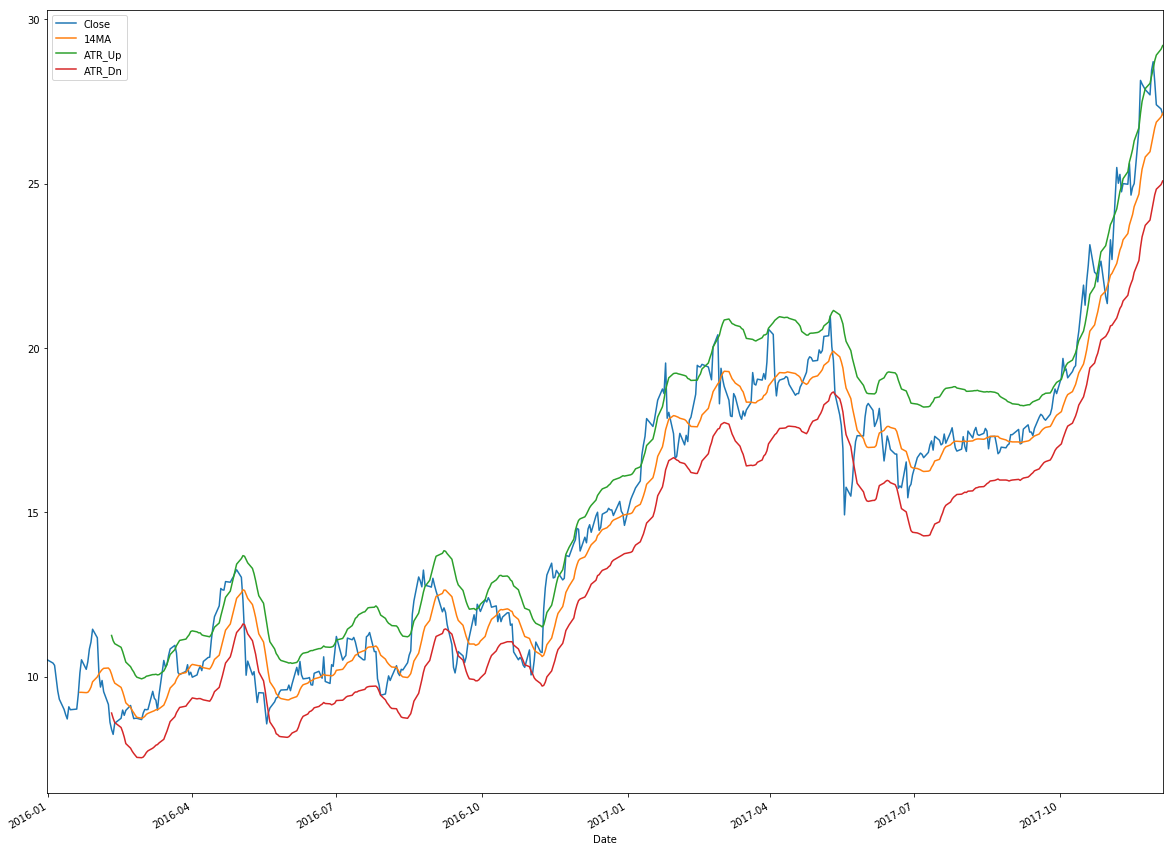

In [71]:
df[['Close','14MA','ATR_Up','ATR_Dn']].plot(legend='best', figsize=(20,16))

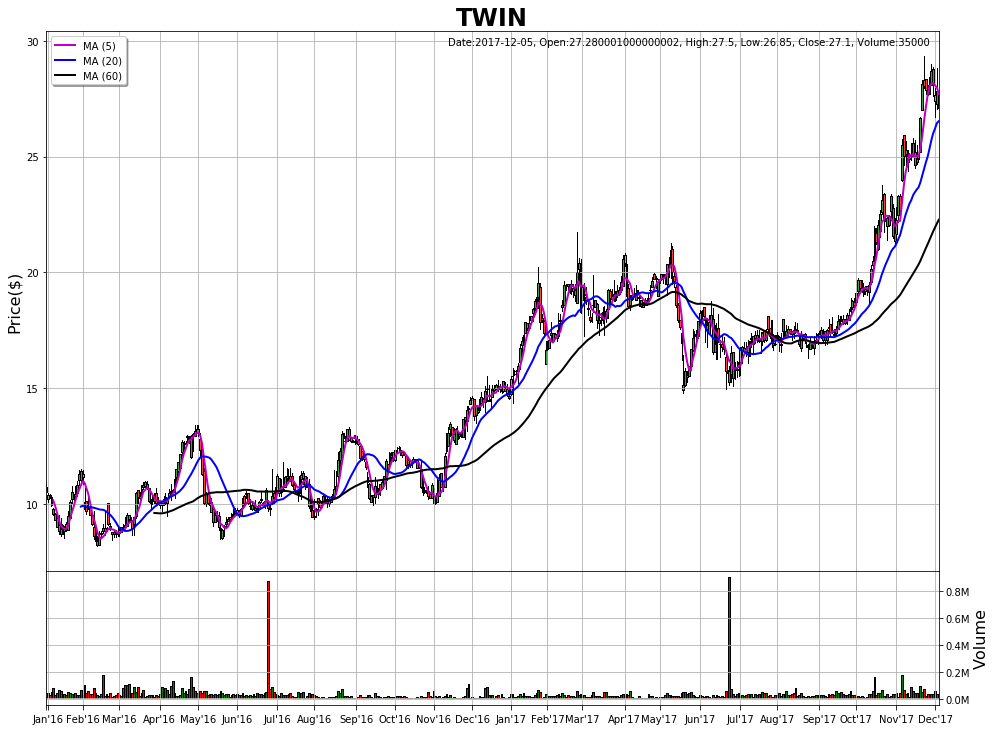

In [14]:
kchart.draw(df,'TWIN')